In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
dataset = pd.read_csv("SolarPrediction.csv")
dataset = dataset.sort_values(['UNIXTime'], ascending = [True])
dataset

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
7416,1472724008,9/1/2016 12:00:00 AM,00:00:08,2.58,51,30.43,103,77.27,11.25,06:07:00,18:38:00
7415,1472724310,9/1/2016 12:00:00 AM,00:05:10,2.83,51,30.43,103,153.44,9.00,06:07:00,18:38:00
7414,1472725206,9/1/2016 12:00:00 AM,00:20:06,2.16,51,30.43,103,142.04,7.87,06:07:00,18:38:00
7413,1472725505,9/1/2016 12:00:00 AM,00:25:05,2.21,51,30.43,103,144.12,18.00,06:07:00,18:38:00
7412,1472725809,9/1/2016 12:00:00 AM,00:30:09,2.25,51,30.43,103,67.42,11.25,06:07:00,18:38:00
...,...,...,...,...,...,...,...,...,...,...,...
24526,1483263302,12/31/2016 12:00:00 AM,23:35:02,1.22,41,30.34,83,238.94,6.75,06:57:00,17:54:00
24525,1483263601,12/31/2016 12:00:00 AM,23:40:01,1.21,41,30.34,82,236.79,5.62,06:57:00,17:54:00
24524,1483263904,12/31/2016 12:00:00 AM,23:45:04,1.21,42,30.34,81,218.28,7.87,06:57:00,17:54:00
24523,1483264203,12/31/2016 12:00:00 AM,23:50:03,1.19,41,30.34,80,215.23,7.87,06:57:00,17:54:00


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32686 entries, 7416 to 24522
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 3.0+ MB


In [4]:
dataset.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


In [5]:
from datetime import datetime
from pytz import timezone
import pytz
hawaii= timezone('Pacific/Honolulu')
dataset.index =  pd.to_datetime(dataset['UNIXTime'], unit='s')
dataset.index = dataset.index.tz_localize(pytz.utc).tz_convert(hawaii)
dataset['MonthOfYear'] = dataset.index.strftime('%m').astype(int)
dataset['DayOfYear'] = dataset.index.strftime('%j').astype(int)
dataset['WeekOfYear'] = dataset.index.strftime('%U').astype(int)
dataset['TimeOfDay(h)'] = dataset.index.hour
dataset['TimeOfDay(m)'] = dataset.index.hour*60 + dataset.index.minute
dataset['TimeOfDay(s)'] = dataset.index.hour*60*60 + dataset.index.minute*60 + dataset.index.second
dataset['TimeSunRise'] = pd.to_datetime(dataset['TimeSunRise'], format='%H:%M:%S')
dataset['TimeSunSet'] = pd.to_datetime(dataset['TimeSunSet'], format='%H:%M:%S')
dataset['DayLength(s)'] = dataset['TimeSunSet'].dt.hour*60*60 \
                           + dataset['TimeSunSet'].dt.minute*60 \
                           + dataset['TimeSunSet'].dt.second \
                           - dataset['TimeSunRise'].dt.hour*60*60 \
                           - dataset['TimeSunRise'].dt.minute*60 \
                           - dataset['TimeSunRise'].dt.second
dataset.drop(['Data','Time','TimeSunRise','TimeSunSet'], inplace=True, axis=1)
dataset.head()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,MonthOfYear,DayOfYear,WeekOfYear,TimeOfDay(h),TimeOfDay(m),TimeOfDay(s),DayLength(s)
UNIXTime,,,,,,,,,,,,,,
2016-09-01 00:00:08-10:00,1472724008,2.58,51,30.43,103,77.27,11.25,9,245,35,0,0,8,45060
2016-09-01 00:05:10-10:00,1472724310,2.83,51,30.43,103,153.44,9.00,9,245,35,0,5,310,45060
2016-09-01 00:20:06-10:00,1472725206,2.16,51,30.43,103,142.04,7.87,9,245,35,0,20,1206,45060
2016-09-01 00:25:05-10:00,1472725505,2.21,51,30.43,103,144.12,18.00,9,245,35,0,25,1505,45060
2016-09-01 00:30:09-10:00,1472725809,2.25,51,30.43,103,67.42,11.25,9,245,35,0,30,1809,45060


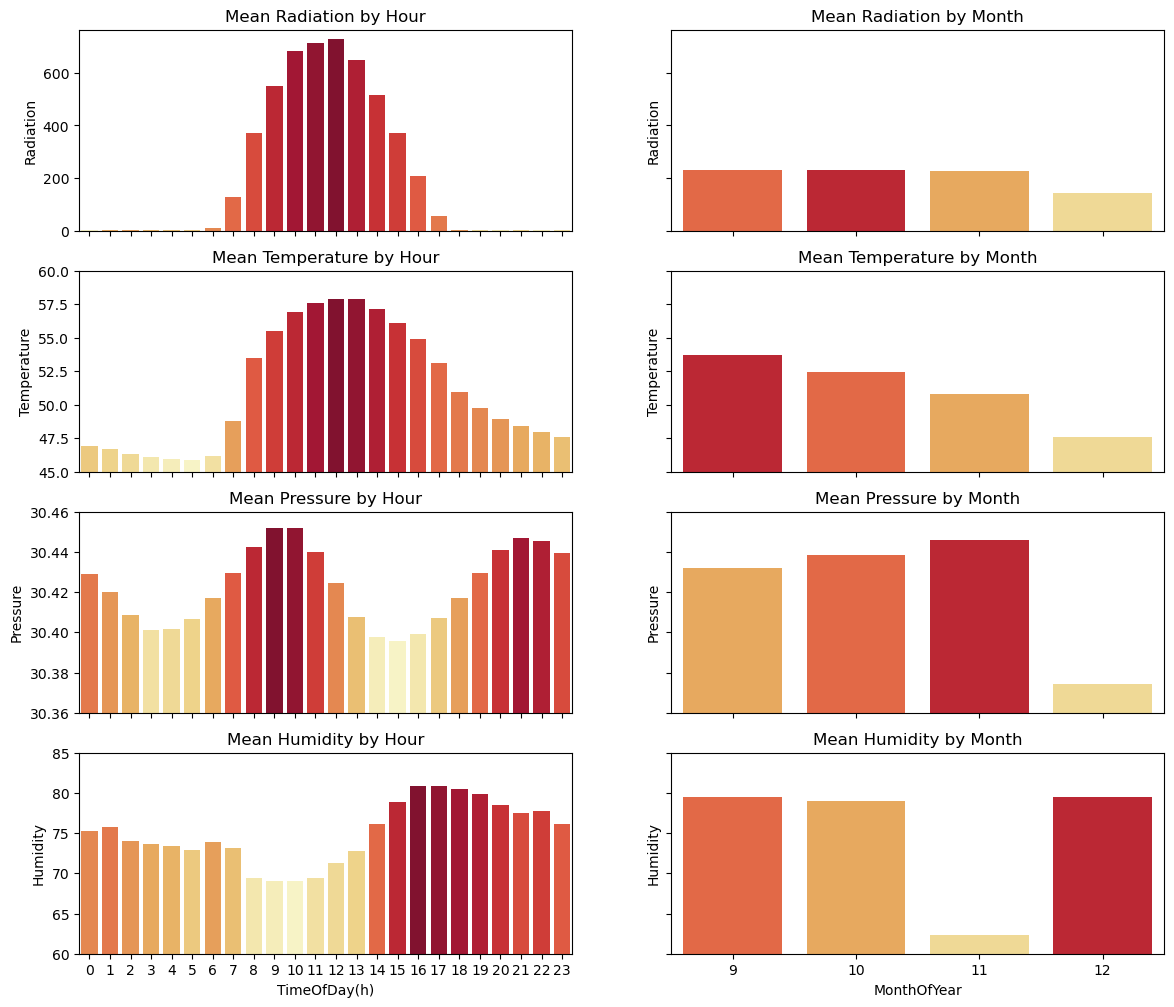

In [6]:
grouped_m=dataset.groupby('MonthOfYear').mean().reset_index()
grouped_w=dataset.groupby('WeekOfYear').mean().reset_index()
grouped_d=dataset.groupby('DayOfYear').mean().reset_index()
grouped_h=dataset.groupby('TimeOfDay(h)').mean().reset_index()

f, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, sharex='col', sharey='row', figsize=(14,12))
ax3.set_ylim(45,60)
ax5.set_ylim(30.36,30.46)
ax7.set_ylim(60,85)

ax1.set_title('Mean Radiation by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Radiation'].argsort().argsort() 
g = sns.barplot(x="TimeOfDay(h)", y='Radiation', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax1)
ax1.set_xlabel('')

ax2.set_title('Mean Radiation by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Radiation'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='Radiation', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax2)
ax2.set_xlabel('')

ax3.set_title('Mean Temperature by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Temperature'].argsort().argsort() 
g = sns.barplot(x="TimeOfDay(h)", y='Temperature', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax3)
ax3.set_xlabel('')

ax4.set_title('Mean Temperature by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Temperature'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='Temperature', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax4)
ax4.set_xlabel('')

ax5.set_title('Mean Pressure by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Pressure'].argsort().argsort() 
g = sns.barplot(x="TimeOfDay(h)", y='Pressure', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax5)
ax5.set_xlabel('')

ax6.set_title('Mean Pressure by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Pressure'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='Pressure', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax6)
ax6.set_xlabel('')

ax7.set_title('Mean Humidity by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Humidity'].argsort().argsort() 
g = sns.barplot(x="TimeOfDay(h)", y='Humidity', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax7)

ax8.set_title('Mean Humidity by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Humidity'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='Humidity', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax8)

plt.show()

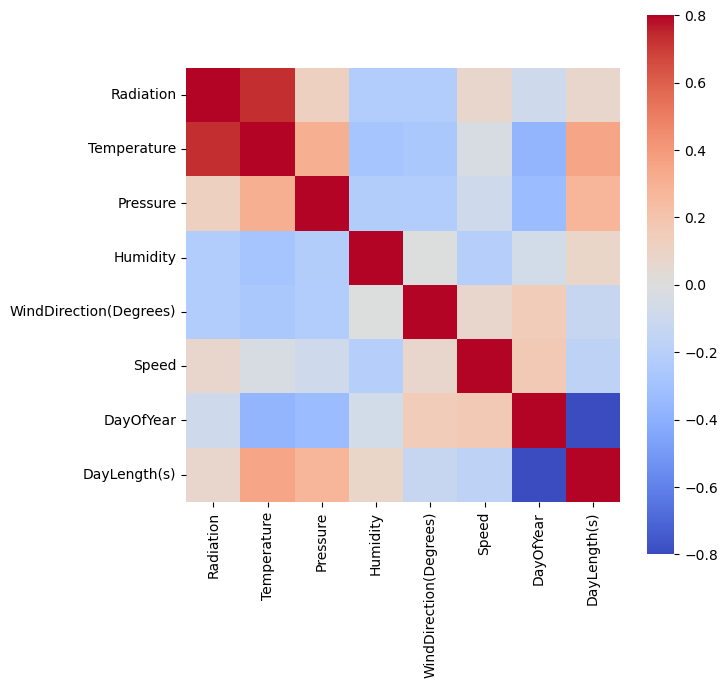

In [7]:
corrmat = dataset.drop(['TimeOfDay(h)', 'TimeOfDay(m)', 'TimeOfDay(s)', 'UNIXTime', 'MonthOfYear', 'WeekOfYear'], inplace=False, axis=1)
corrmat = corrmat.corr()
f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(corrmat, vmin=-.8, vmax=.8, square=True, cmap = 'coolwarm')
plt.show()

In [8]:
X = dataset[['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 
             'Speed', 'DayOfYear', 'TimeOfDay(s)']]
y = dataset['Radiation']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 0)

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(X_train, y_train)
feature_importances = regressor.feature_importances_

X_train_opt = X_train.copy()
removed_columns = pd.DataFrame()
models = []
r2s_opt = []

for i in range(0,5):
    least_important = np.argmin(feature_importances)
    removed_columns = removed_columns.append(X_train_opt.pop(X_train_opt.columns[least_important]))
    regressor.fit(X_train_opt, y_train)
    feature_importances = regressor.feature_importances_
    accuracies = cross_val_score(estimator = regressor,
                                 X = X_train_opt,
                                 y = y_train, cv = 5,
                                 scoring = 'r2')
    r2s_opt = np.append(r2s_opt, accuracies.mean())
    models = np.append(models, ", ".join(list(X_train_opt)))
    
feature_selection = pd.DataFrame({'Features':models,'r2 Score':r2s_opt})
feature_selection.head()

/var/folders/m7/fd_p4dd55_xf1f1ttd8mbdmr0000gn/T/ipykernel_4731/2736064222.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  removed_columns = removed_columns.append(X_train_opt.pop(X_train_opt.columns[least_important]))
/var/folders/m7/fd_p4dd55_xf1f1ttd8mbdmr0000gn/T/ipykernel_4731/2736064222.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  removed_columns = removed_columns.append(X_train_opt.pop(X_train_opt.columns[least_important]))
/var/folders/m7/fd_p4dd55_xf1f1ttd8mbdmr0000gn/T/ipykernel_4731/2736064222.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  removed_columns = removed_columns.append(X_train_opt.pop(X_train_opt.columns[least_important]))
/var/folders/m7/fd_p4dd55_xf1f1ttd8mbdmr0000gn/T/ipykernel_47

,Features,r2 Score
0,"Temperature, Pressure, Humidity, WindDirection...",0.932683
1,"Temperature, Humidity, WindDirection(Degrees),...",0.931575
2,"Temperature, Humidity, DayOfYear, TimeOfDay(s)",0.933883
3,"Temperature, DayOfYear, TimeOfDay(s)",0.933187
4,"Temperature, TimeOfDay(s)",0.800596


In [11]:
X_train_best = X_train[['Temperature', 'DayOfYear', 'TimeOfDay(s)']]
X_test_best = X_test[['Temperature', 'DayOfYear', 'TimeOfDay(s)']]
regressor.fit(X_train_best, y_train)

RandomForestRegressor()

In [12]:
accuracies = cross_val_score(estimator = regressor, X = X_train_best,
                             y = y_train, cv = 10, scoring = 'r2')
accuracy = accuracies.mean()
print('r2 = {}'.format(accuracy))

r2 = 0.934070913136147


In [13]:
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
y_pred = regressor.predict(X_test_best)
explained_variance_score = explained_variance_score(y_test, y_pred)
mean_squared_error = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('explained variance = {}'.format(explained_variance_score))
print('mse = {}'.format(mean_squared_error))
print('r2 = {}'.format(r_squared))

explained variance = 0.9393423423626016
mse = 6258.650927530407
r2 = 0.939283566667588


In [14]:
# Predicting for whole dataset
dataset['y_pred'] = regressor.predict(dataset[['Temperature', 'DayOfYear', 'TimeOfDay(s)']])

# Create Interactive Plot Using Bokeh
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import Range1d
output_notebook() 

p = figure(plot_width=800, 
           plot_height=400,
           title="Solar Irradiance Predictions",
           x_axis_label='Date and Time',
           y_axis_label='Solar Irradiance',
           x_axis_type="datetime")
p.x_range = Range1d(dataset.index[0], dataset.index[600])
p.y_range = Range1d(-100, 1800, bounds=(-100, 1800))
p.line(dataset.index, dataset['Radiation'], legend='Observed Solar Irradiance', line_width=1)
p.line(dataset.index, dataset['y_pred'], legend='Predicted Solar Irradiance', line_width=1, line_color="red")

show(p, notebook_handle = True)

Loading BokehJS ...

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import pytz
from sklearn import linear_model

%matplotlib inline

In [16]:
# import data
data = pd.read_csv('SolarPrediction.csv')

# read few lines
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [17]:
# time is in reverse order, therefore order ascending
data = data.sort_values(by='UNIXTime', ascending=True).reset_index(drop=True)
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1472724008,9/1/2016 12:00:00 AM,00:00:08,2.58,51,30.43,103,77.27,11.25,06:07:00,18:38:00
1,1472724310,9/1/2016 12:00:00 AM,00:05:10,2.83,51,30.43,103,153.44,9.00,06:07:00,18:38:00
2,1472725206,9/1/2016 12:00:00 AM,00:20:06,2.16,51,30.43,103,142.04,7.87,06:07:00,18:38:00
3,1472725505,9/1/2016 12:00:00 AM,00:25:05,2.21,51,30.43,103,144.12,18.00,06:07:00,18:38:00
4,1472725809,9/1/2016 12:00:00 AM,00:30:09,2.25,51,30.43,103,67.42,11.25,06:07:00,18:38:00


In [18]:
# set Hawaii tz
HItz = pytz.timezone(zone='US/Hawaii')

# create a column which is type datetime
datetimeHI = data['UNIXTime'].apply(lambda x: 
                                 datetime.datetime.utcfromtimestamp(x).replace(tzinfo=pytz.utc).astimezone(HItz))
# add to df
data['DatetimeHI'] = datetimeHI

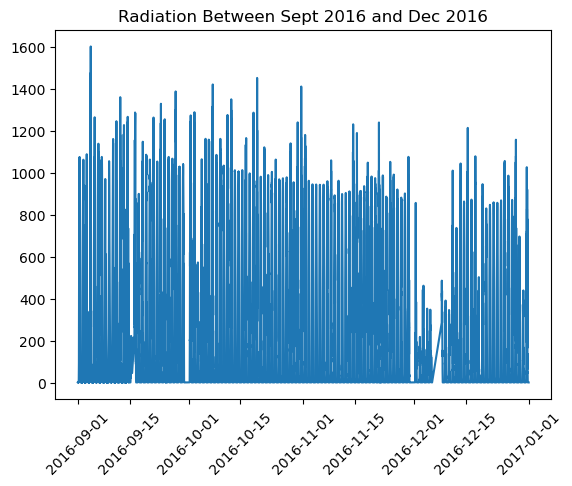

In [19]:
# show data to predict
plt.plot(data['DatetimeHI'], data['Radiation'])
plt.title('Radiation Between Sept 2016 and Dec 2016')
plt.xticks(rotation=45);

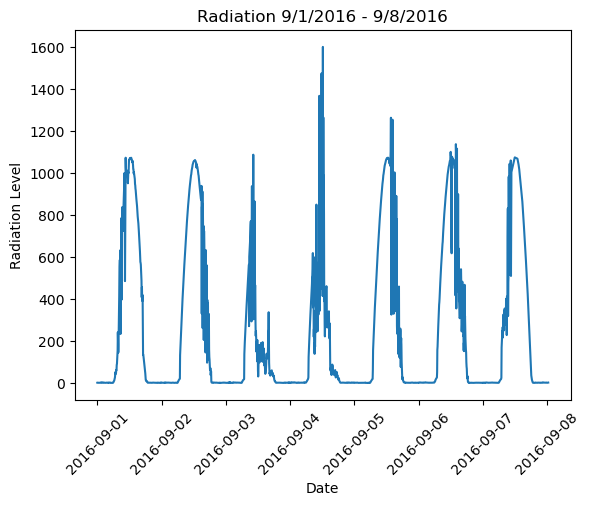

In [20]:
# extract one week of data
weekendmarker = datetime.datetime(2016,9, 8).replace(tzinfo=HItz)
weekonedata = data[data['DatetimeHI'] < weekendmarker]
plt.plot(weekonedata['DatetimeHI'], weekonedata['Radiation'])
plt.title('Radiation 9/1/2016 - 9/8/2016')
plt.xticks(rotation=45)
plt.ylabel('Radiation Level')
plt.xlabel('Date');

In [21]:
def abstract_week_plot(ax, dates, col, colname):
    # function to take in column of data and plot the
    # week's worth of data
    # returns an axis so can be added to a larger plot
    
    # color radiation so it is easy to identify as the dependent var
    if colname == 'Radiation':
        plt_color = 'red'
    else:
        plt_color = 'blue'
    
    # plot the data
    ax.plot(dates, col, c=plt_color)
    
    # format
    ax.set_title('{colname} 9/1/2016 - 9/8/2016'.format(colname=colname))
    ax.set_ylabel('{colname} Level'.format(colname=colname))
    ax.set_xlabel('Date')
    
    # rotation
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    
    return ax

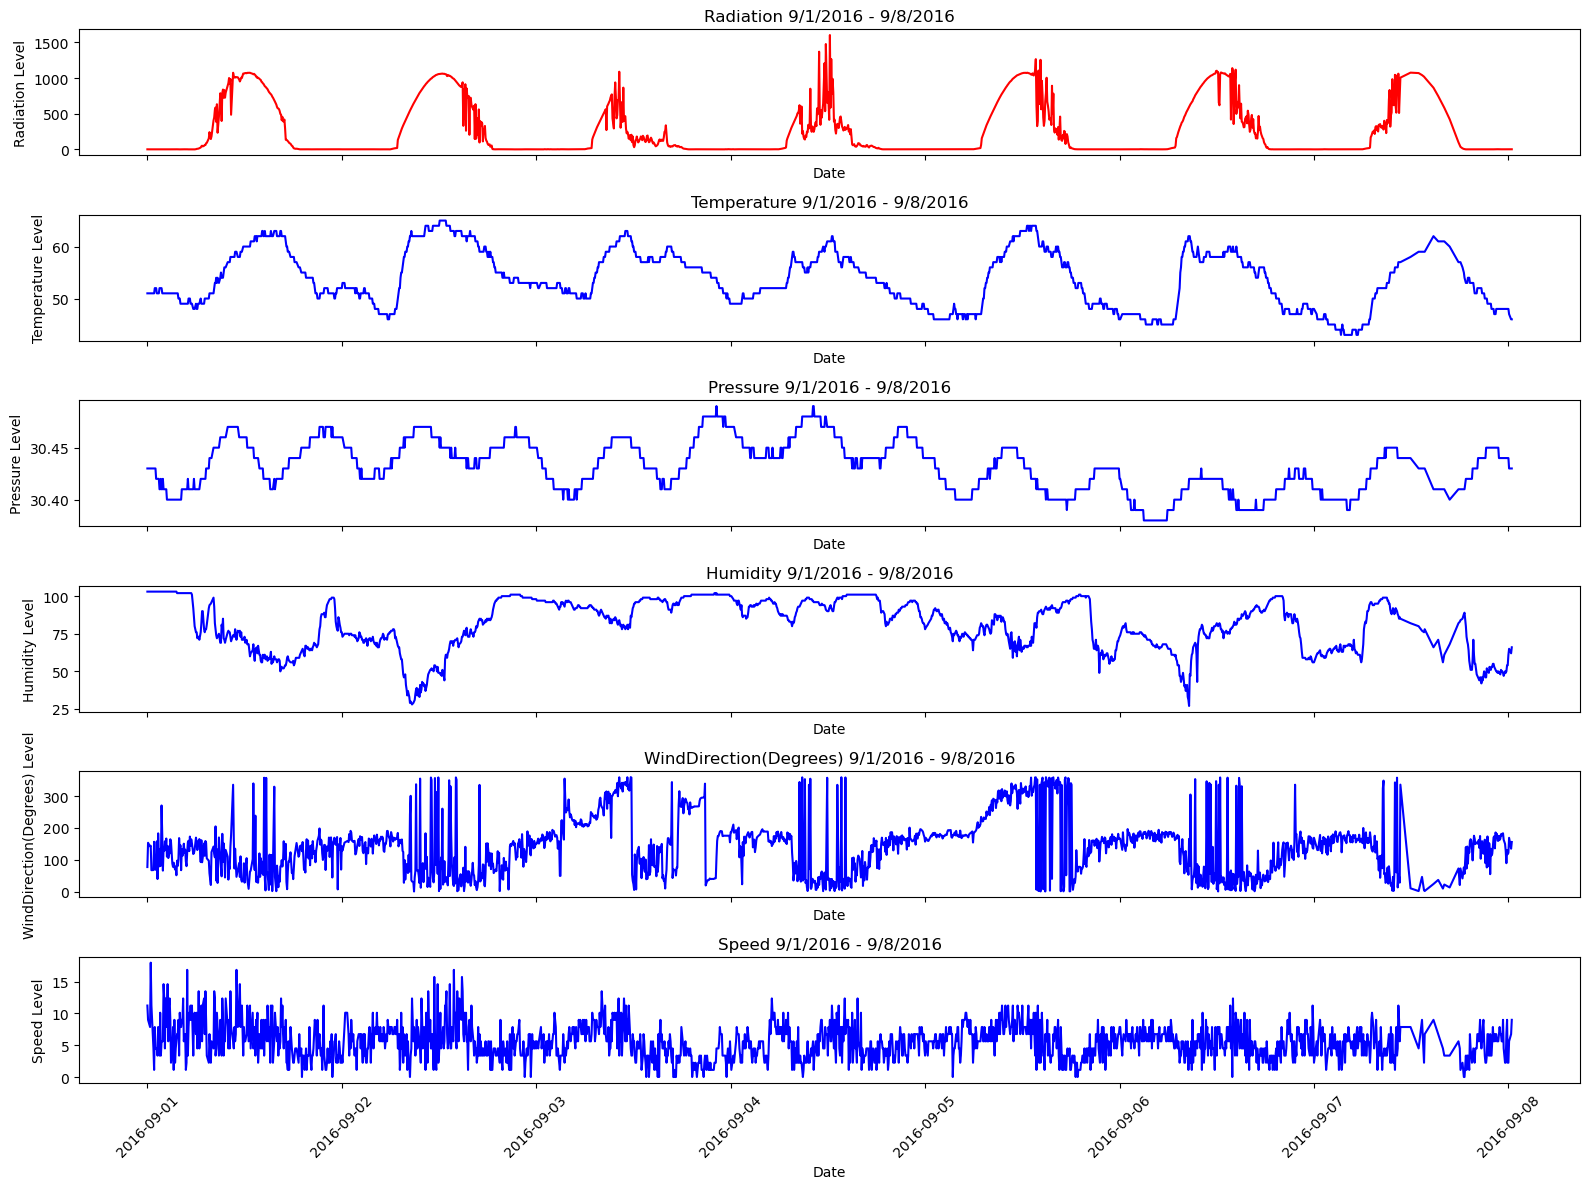

In [22]:
# make plot larger
plt.rcParams['figure.figsize'] = 16, 12

# loop over all columns important in data
ts_cols = ['Radiation', 'Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed']
fig, axes = plt.subplots(len(ts_cols), sharex=True)
for i, ax in enumerate(axes):
    ax = abstract_week_plot(ax, weekonedata['DatetimeHI'], weekonedata[ts_cols[i]], ts_cols[i])

# prevent squashing
fig.tight_layout()

In [23]:
def abstract_subsection_plot(ax, data, colname, start_dt, end_dt):
    # function to take in column of data and plot the
    # week's worth of data
    # returns an axis so can be added to a larger plot
    
    # subset the data
    subset_data = data[(data['DatetimeHI'] > start_dt) & (data['DatetimeHI'] < end_dt)]
    dates = subset_data['DatetimeHI']
    col = subset_data[colname]
    
    # turn start date and end date into strings
    srt = start_dt.strftime('%m/%d/%Y')
    end = end_dt.strftime('%m/%d/%Y')
    
    # color radiation so it is easy to identify as the dependent var
    if colname == 'Radiation':
        plt_color = 'red'
    else:
        plt_color = 'blue'
    
    # plot the data
    ax.plot(dates, col, c=plt_color)
    
    # format
    ax.set_title('{colname} {srt} - {end}'.format(colname=colname, srt=srt, end=end))
    ax.set_ylabel('{colname} Level'.format(colname=colname))
    ax.set_xlabel('Date')
    
    # rotation
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    
    return ax

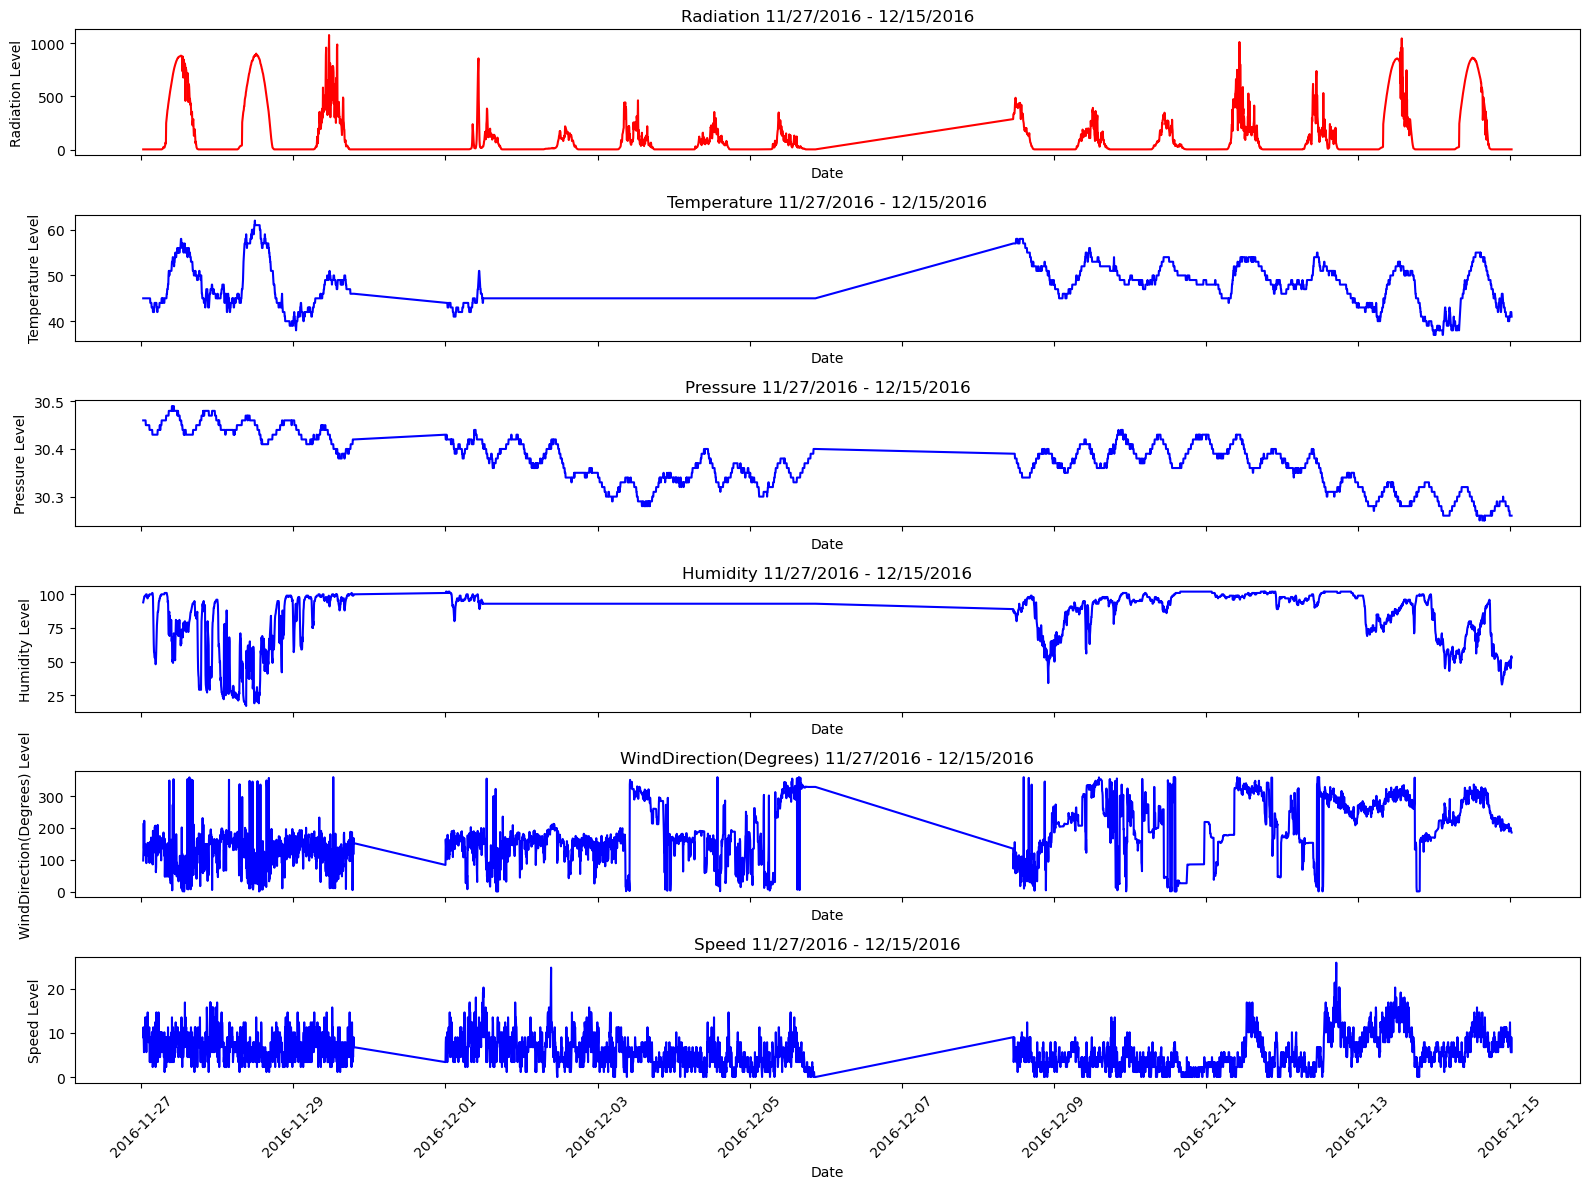

In [24]:
# loop over all columns important in data
fig, axes = plt.subplots(len(ts_cols), sharex=True)
for i, ax in enumerate(axes):
    ax = abstract_subsection_plot(
        ax,
        data,
        ts_cols[i],
        datetime.datetime(2016,11, 27).replace(tzinfo=HItz),
        datetime.datetime(2016,12, 15).replace(tzinfo=HItz),
    )
# prevent squashing
fig.tight_layout()

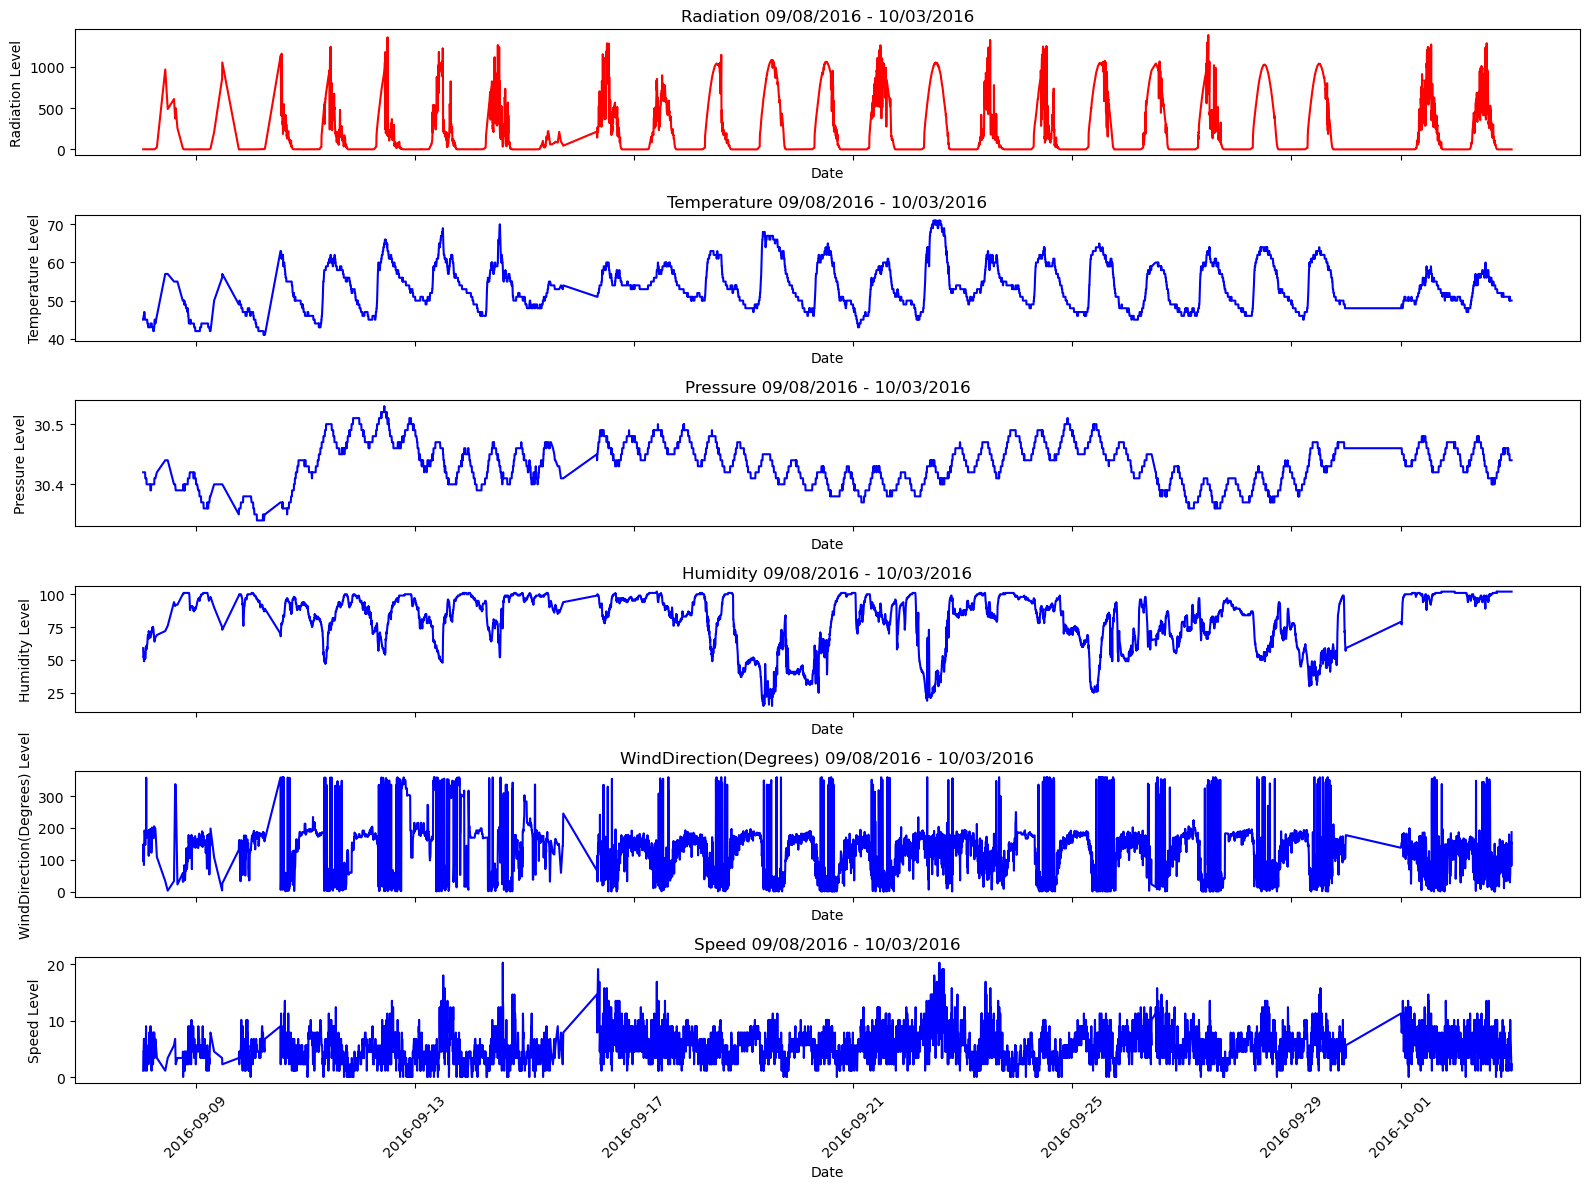

In [25]:
# loop over all columns important in data
fig, axes = plt.subplots(len(ts_cols), sharex=True)
for i, ax in enumerate(axes):
    ax = abstract_subsection_plot(
        ax,
        data,
        ts_cols[i],
        datetime.datetime(2016,9, 8).replace(tzinfo=HItz),
        datetime.datetime(2016,10, 3).replace(tzinfo=HItz),
    )
# prevent squashing
fig.tight_layout()


In [26]:
start_train = datetime.datetime(2016, 9, 1).replace(tzinfo=HItz)
end_train = datetime.datetime(2016,11, 29).replace(tzinfo=HItz)
start_test = datetime.datetime(2016,12, 9).replace(tzinfo=HItz)
end_test = datetime.datetime(2016,12, 31).replace(tzinfo=HItz)

In [27]:
def is_day(row):
    sun_rise = datetime.datetime.strptime(row['TimeSunRise'], '%H:%M:%S').time()
    sun_set = datetime.datetime.strptime(row['TimeSunSet'], '%H:%M:%S').time()
    if ((sun_set > row['DatetimeHI'].time()) & (sun_rise < row['DatetimeHI'].time())):
        return 1
    else:
        return 0
    
day_bool = np.empty(data.shape[0])

for i in np.arange(data.shape[0]):
    day_bool[i] = is_day(data.iloc[i])

In [28]:
day_bool

array([0., 0., 0., ..., 0., 0., 0.])

In [29]:
data['Day'] = day_bool

In [30]:
# add interaction terms for Day
data['Day x Temperature'] = data['Temperature'] * day_bool
data['Day x Pressure'] = data['Pressure'] * day_bool
data['Day x Humidity'] = data['Humidity'] * day_bool
data['Day x WindDirection(Degrees)'] = data['WindDirection(Degrees)'] * day_bool
data['Day x Speed'] = data['Speed'] * day_bool

In [31]:
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,DatetimeHI,Day,Day x Temperature,Day x Pressure,Day x Humidity,Day x WindDirection(Degrees),Day x Speed
0,1472724008,9/1/2016 12:00:00 AM,00:00:08,2.58,51,30.43,103,77.27,11.25,06:07:00,18:38:00,2016-09-01 00:00:08-10:00,0.0,0.0,0.0,0.0,0.0,0.0
1,1472724310,9/1/2016 12:00:00 AM,00:05:10,2.83,51,30.43,103,153.44,9.00,06:07:00,18:38:00,2016-09-01 00:05:10-10:00,0.0,0.0,0.0,0.0,0.0,0.0
2,1472725206,9/1/2016 12:00:00 AM,00:20:06,2.16,51,30.43,103,142.04,7.87,06:07:00,18:38:00,2016-09-01 00:20:06-10:00,0.0,0.0,0.0,0.0,0.0,0.0
3,1472725505,9/1/2016 12:00:00 AM,00:25:05,2.21,51,30.43,103,144.12,18.00,06:07:00,18:38:00,2016-09-01 00:25:05-10:00,0.0,0.0,0.0,0.0,0.0,0.0
4,1472725809,9/1/2016 12:00:00 AM,00:30:09,2.25,51,30.43,103,67.42,11.25,06:07:00,18:38:00,2016-09-01 00:30:09-10:00,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
from datetime import timedelta
import time

# create a series of number of hours since sunrise
# if not Day, then 0
hour_of_day = np.empty((data.shape[0], ))

for ix in data.index:
    # sunrise, sunset; probably a fiddler on the roof joke in there somewhere
    sr = datetime.datetime.strptime(data.loc[ix, 'TimeSunRise'], '%H:%M:%S').replace(tzinfo=HItz)
    ss = datetime.datetime.strptime(data.loc[ix, 'TimeSunSet'], '%H:%M:%S').replace(tzinfo=HItz)
    
    # if night, 0
    if ((data.loc[ix, 'DatetimeHI'].time() > ss.time()) | (data.loc[ix, 'DatetimeHI'].time() < sr.time())):
        hour_of_day[ix] = 0.
    else:
        time_ix = data.loc[ix, 'DatetimeHI'].time()
    
        # need to account for minutes
        # sunrise of 6:59 and time of 7:01 is closer to 0 hours apart than 1
        if (time_ix.hour - sr.hour > 0) & (time_ix.minute - sr.minute < 30):
            hour_of_day[ix] = time_ix.hour - sr.hour - 1
        else:
            hour_of_day[ix] = time_ix.hour - sr.hour

In [33]:
hour_of_day

array([0., 0., 0., ..., 0., 0., 0.])